<a href="https://colab.research.google.com/github/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/blob/main/notebooks/Finance_news_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
!pip install yahoo-fin


In [ ]:
import yfinance as yf

# Récupérer les titres d'actualités pour Tesla
tesla = yf.Ticker("TSLA")
news = tesla.news

# Afficher les titres
for item in news:
    print(item['title'])

Analysts mixed on Tesla's Chinese rivals
RBC Capital Reiterates Buy on Tesla, Inc. (TSLA) as Robotaxi and AI Initiatives Gain Momentum
Musk’s Wealth Has Soared Since Trump’s Win. But These Billionaires Have Lost Money.
Meet the Everyday Traders Riding MicroStrategy’s Furious Rally
Musk’s DOGE Plans Rely on White House Budget Office. Conflicts Await.
Better Buy: Dogecoin, Shiba Inu, or Bitcoin?
1 AI and Robotics Stock to Buy Before It Soars 400% to $5 Trillion, According to a Wall Street Expert
Tesla and Bitcoin Have Soared Since Election Day. We Size Up the Valuations.


In [ ]:
# Créer un DataFrame avec les titres
import pandas as pd
tesla_news = pd.DataFrame(news)
tesla_news = tesla_news[['title', 'providerPublishTime']]
tesla_news['providerPublishTime'] = pd.to_datetime(tesla_news['providerPublishTime'], unit='s').dt.date

# Filtrer les titres qui mentionnent Tesla explicitement
tesla_news = tesla_news[tesla_news['title'].str.contains("Tesla", case=False)]
print(tesla_news.head())

                                               title providerPublishTime
0           Analysts mixed on Tesla's Chinese rivals          2024-11-28
1  RBC Capital Reiterates Buy on Tesla, Inc. (TSL...          2024-11-28
7  Tesla and Bitcoin Have Soared Since Election D...          2024-11-28


In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline

# Charger FinBERT
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

# Appliquer l'analyse des sentiments sur les titres
tesla_news['sentiment'] = tesla_news['title'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
print(tesla_news[['title', 'sentiment']].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

                                               title sentiment
0           Analysts mixed on Tesla's Chinese rivals  Negative
1  RBC Capital Reiterates Buy on Tesla, Inc. (TSL...  Positive
7  Tesla and Bitcoin Have Soared Since Election D...   Neutral


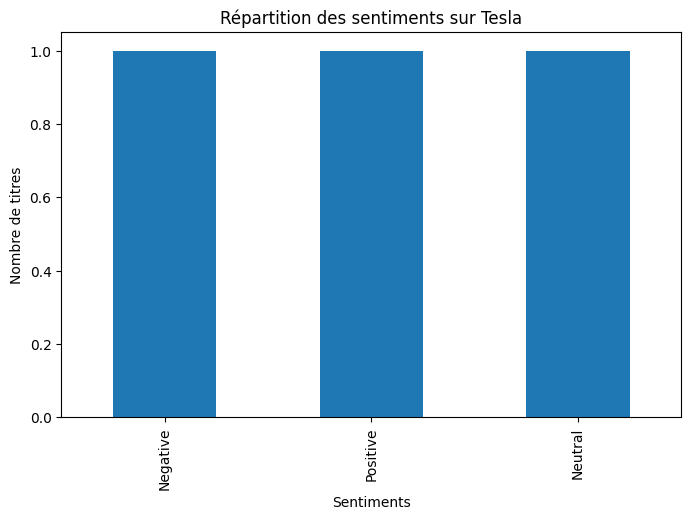

In [ ]:
import matplotlib.pyplot as plt

# Répartition des sentiments
tesla_news['sentiment'].value_counts().plot(kind='bar', title='Répartition des sentiments sur Tesla', figsize=(8, 5))
plt.xlabel('Sentiments')
plt.ylabel('Nombre de titres')
plt.show()
